In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='asia', src=FILE, fpath='../table/earthquake/earthquake.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.02173471450805664] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "Burglary": "categorical",
    "MaryCalls": "categorical",
    "Alarm": "categorical",
    "JohnCalls": "categorical",
    "Earthquake": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'Burglary': ['equal'], 'MaryCalls': ['equal'], 'Alarm': ['equal'], 'JohnCalls': ['equal'], 'Earthquake': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.08449268341064453] Load Data execution time: 0.06275796890258789



In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.09607505798339844] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 2 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 2, and the bound is 0.00180278
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 5/5 [00:00<00:00, 262.00it/s]
INFO:profiler.data.transformer:Number of training samples: 5000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.22007489204406738] Create Training Data execution time: 0.12399983406066895



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.23347759246826172] Learn Structure start

INFO:profiler.learner:use threshold 0.3172
INFO:profiler.utility:[0.37337493896484375] Learn Structure execution time: 0.13989734649658203



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.3825569152832031] Get Dependencies start

INFO:profiler.utility:[0.4219694137573242] Get Dependencies execution time: 0.039412498474121094



Burglary -> Alarm (0.007934158617896083)
Alarm -> JohnCalls (0.08206783033137319)
Alarm -> Earthquake (0.020963023083187246)
Alarm -> MaryCalls (0.03260476072035798)
{'Burglary': array([], dtype=object), 'Alarm': array(['Burglary'], dtype=object), 'JohnCalls': array(['Alarm'], dtype=object), 'Earthquake': array(['Alarm'], dtype=object), 'MaryCalls': array(['Alarm'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


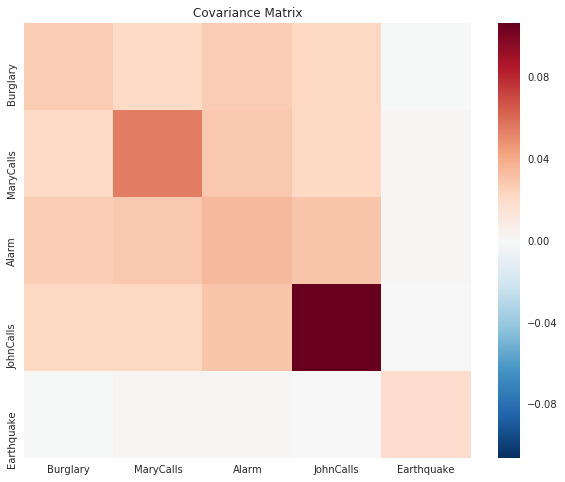

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


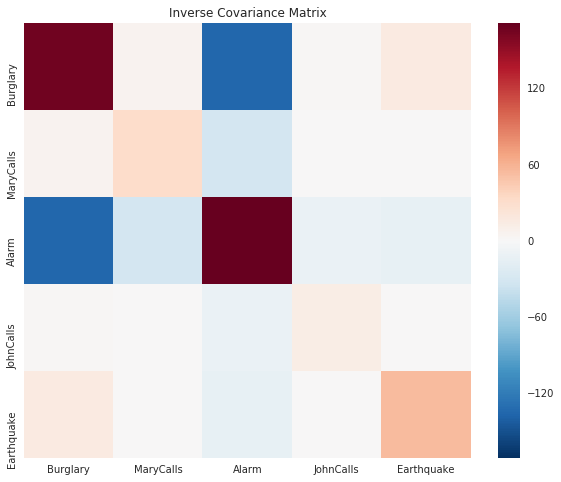

threshold =  10
sum =  [159.23226114  38.85740767 194.61430049  14.63568976  30.01914823]
attr =  Index(['Burglary', 'MaryCalls', 'Alarm', 'JohnCalls', 'Earthquake'], dtype='object')
Attr w/o dependency: 
 Index([], dtype='object')


Attr w/ dependency: 
 Index([['Burglary'], ['MaryCalls'], ['Alarm'], ['JohnCalls'], ['Earthquake']], dtype='object')


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


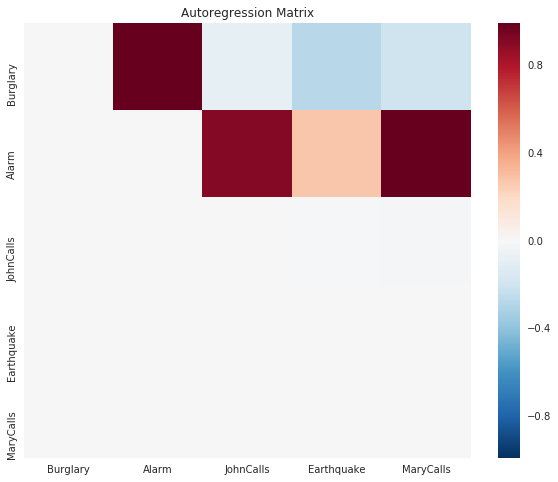

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()
pf.session.timer.to_csv()